In [ ]:
import keras
from keras.models import load_model
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, BatchNormalization
from keras.layers import Dense, Dropout, Flatten
import cv2
import keras.utils as image
import numpy as np
import pandas as pd
import os
import tools
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [ ]:
##################### TEST VALUES #####################
model_file = '/Users/mtcd/Downloads/MEAD_DATASET/mead_100/model_100_48x48.h5'
#path_frames_analyze = '/Users/mtcd/Downloads/@images_to_test_model'
path_frames_analyze = '/Users/mtcd/Downloads/@images_to_test_model/adfes'
#path_frames_analyze = '/Users/mtcd/Downloads/mead_2023'
path_save_csv = '/Users/mtcd/Downloads/@images_to_test_model/analyzed_images_to_test_model.csv'
dataset_name = 'mead'
resolution1_model = 48
resolution2_model = 48
#######################################################

In [ ]:
def emotion_analysis(emotions):
    objects = ['angry', 'disgusted', 'fear', 'happy', 'sad', 'surprised', 'neutral']
    main_emotion = int(np.where(emotions == max(emotions))[0])
    main_emotion = objects[main_emotion]

    return main_emotion

def analyse_frame(image_file, model_file, resolution2_model, resolution1_model):
    model = load_model(model_file)
    
    img = image.load_img(image_file, color_mode="grayscale", target_size=(resolution1_model, resolution2_model))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis = 0) 
    x /= 255
    custom = model.predict(x)
    emotion = emotion_analysis(custom[0])

    return emotion

In [ ]:
to_save = []
with open(path_save_csv, 'w') as f:
    f.write('file_name,emotion_original,emotion_analyzed,dataset\n')

    for folder, subfolder, files in os.walk(path_frames_analyze):                
        for file in files:
            try:
                if file == '.DS_Store': continue
                image_file = os.path.join(path_frames_analyze,file)
                emotion_analyzed = analyse_frame(image_file, model_file,resolution1_model,resolution2_model)            
                emotion_file = tools.define_emotion_from_file_name_(file)
                f.write('%s,%s,%s,%s' % (file, emotion_file, emotion_analyzed, dataset_name))
                f.write('\n')
                
            except:
                next

In [ ]:
df = pd.read_csv(path_save_csv)
df = df['emotion_analyzed'] == df['emotion_original']

print('----')
print(df.value_counts())
print('----')
print(f'Total : {df.count()}')

In [20]:
df = pd.read_csv(path_save_csv)
df = df['emotion_analyzed'] == df['emotion_original']

print(f'Analisado corretamente: {df.value_counts()[1]}')
print( str( ( df.value_counts()[1]/ df.count() ) * 100 ), '%')
print('----')
print(f'Analisado incorretamente: {df.value_counts()[0]}')
print( str( ( df.value_counts()[0]/ df.count() ) * 100 ), '%')
print('----')
print(df.value_counts())
print('----')
print(f'Total : {df.count()}')

Analisado corretamente: 78
15.476190476190476 %
----
Analisado incorretamente: 426
84.52380952380952 %
----
False    426
True      78
dtype: int64
----
Total : 504


In [21]:
emotions = ['angry', 'disgusted', 'fear', 'happy', 'sad', 'surprised', 'neutral']

df = pd.read_csv(path_save_csv)

emotion_pred = df['emotion_analyzed'].values
y_true = df['emotion_original'].values

print(classification_report(y_true, emotion_pred, target_names = emotions))

              precision    recall  f1-score   support

       angry       0.00      0.00      0.00        36
   disgusted       0.24      0.08      0.12        72
        fear       0.13      0.50      0.21        72
       happy       0.00      0.00      0.00        72
         sad       0.00      0.00      0.00       144
   surprised       0.17      0.50      0.26        72
     neutral       0.00      0.00      0.00        36

    accuracy                           0.15       504
   macro avg       0.08      0.15      0.08       504
weighted avg       0.08      0.15      0.08       504



/Users/mtcd/Library/Mobile Documents/com~apple~CloudDocs/@Pessoal/@Evernote/Estudos/@programming/analyse_dataset_deepface/.venv_add/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mtcd/Library/Mobile Documents/com~apple~CloudDocs/@Pessoal/@Evernote/Estudos/@programming/analyse_dataset_deepface/.venv_add/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mtcd/Library/Mobile Documents/com~apple~CloudDocs/@Pessoal/@Evernote/Estudos/@programming/analyse_dataset_deepface/.venv_add/li

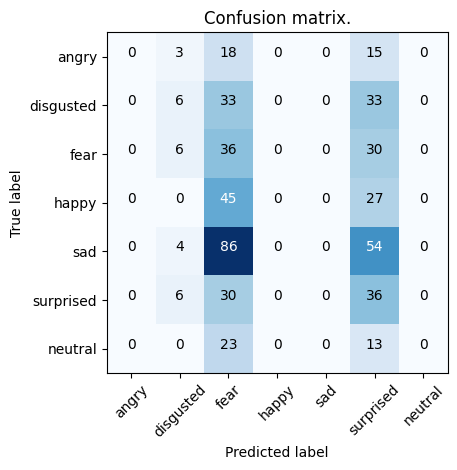

In [26]:
cm=confusion_matrix(y_true, emotion_pred)

title='Confusion matrix.'

plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title(title)

tick_marks = np.arange(len(emotions))

plt.xticks(tick_marks, emotions, rotation=45)
plt.yticks(tick_marks, emotions)

thresh = cm.max() / 2.

for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], 'd'), horizontalalignment="center", color="white" 
    if cm[i, j] > thresh else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()